In [1]:
from monodromy.haar import gates_to_haar
from qiskit.circuit.library import CXGate, iSwapGate

print(gates_to_haar(CXGate()))
print(gates_to_haar(CXGate().power(1 / 2)))
print(gates_to_haar(iSwapGate()))
print(gates_to_haar(iSwapGate().power(1 / 2)))

3.000000000000001
3.540254820808027
3.000000000000001
2.2098826363156774


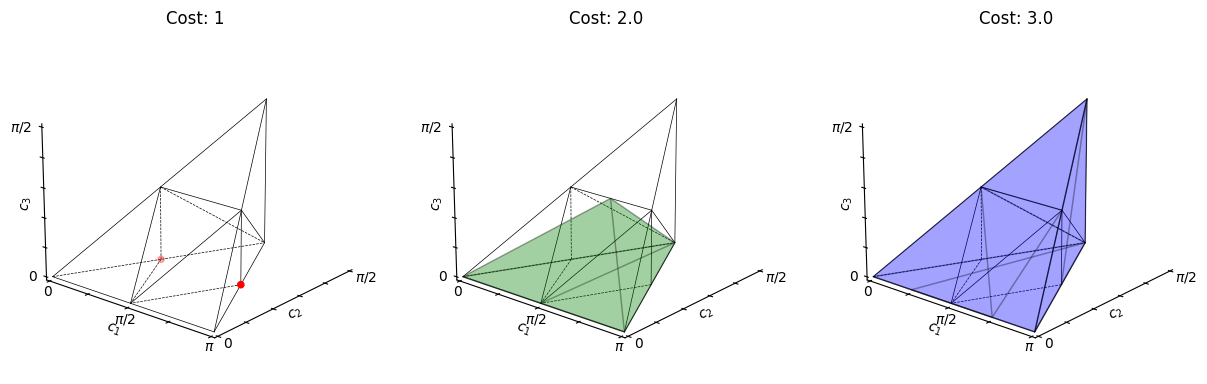

[CircuitPolytope(convex_subpolytopes=[ConvexPolytope(inequalities=[], equalities=[[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], name='origin')], cost=0.0, operations=[]),
 CircuitPolytope(convex_subpolytopes=[ConvexPolytope(inequalities=[[1, 0, 0, 0]], equalities=[[-1, 4, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], name='True ∩ QLR relations ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ True ∩ QLR relations ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ origin ∩ anonymous_convex_polytope_52 ∩ True ∩ A_PU(4)^monodromy ∩ A_PU(4)^monodromy ∩ origin'), ConvexPolytope(inequalities=[[1, 0, 0, 0]], equalities=[[-1, 2, 0, 0], [-1, 0, 4, 0], [1, 0, 0, 4]], name='True ∩ QLR relations ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ anonymous_convex_polytope_53 ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ A_SU(4)^monodromy ∩ origin ∩ anonymous_convex_polytope_52 ∩ True ∩ A_PU(4)^monodromy ∩ A_PU(4)^monodromy ∩ origin')], cost=1, operations=['xx_plus_yy']),
 CircuitPo

In [6]:
from monodromy.render import gates_to_coverage_plot

gates_to_coverage_plot(iSwapGate().power(1 / 2), overlap=False)

In [8]:
from monodromy.depthPass import MonodromyDepth
from qiskit.transpiler.passmanager import PassManager
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler.passes import Depth
from qiskit import QuantumCircuit

pm = PassManager()
pm.append(Depth())
pm.append(MonodromyDepth(basis_gate=iSwapGate().power(1 / 2)))

qc = QuantumCircuit(4)
qc.swap(0, 1)
qc.cx(0, 1)
qc.cx(1, 2)
qc.swap(0, 1)
display(qc.draw())

pm.run(qc)
expected_value = 7
print(f"Depth: {pm.property_set['depth']}")
print(f"Monodromy depth: {pm.property_set['monodromy_depth']}")
assert (
    pm.property_set["monodromy_depth"] == expected_value
), "Monodromy depth not calculated correctly!"

q_0: ─X───■────────X─
      │ ┌─┴─┐      │ 
q_1: ─X─┤ X ├──■───X─
        └───┘┌─┴─┐   
q_2: ────────┤ X ├───
             └───┘   
q_3: ────────────────

Depth: 4
Monodromy depth: 7.0


In [5]:
from monodromy.depthPass import MonodromyDepth
from qiskit.transpiler.passmanager import PassManager
from qiskit.circuit.library import CXGate
from qiskit import QuantumCircuit

pm = PassManager()
pm.append(MonodromyDepth(basis_gate=CXGate()))

qc = QuantumCircuit(3)
qc.swap(0, 1)
qc.cx(0, 1)
qc.cx(1, 2)
qc.swap(0, 1)
display(qc.draw())

pm.run(qc)

pm.property_set["monodromy_depth"]

Considering cx;	Cost 1 and Euclidean volume   0.00%
Considering cx·cx;	Cost 2 and Euclidean volume   0.00%
Considering cx·cx·cx;	Cost 3 and Euclidean volume 100.00%
Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | cx
  0.00% =    0/1    	 | 2.00	 | cx.cx
100.00% =    1/1    	 | 3.00	 | cx.cx.cx


q_0: ─X───■────────X─
      │ ┌─┴─┐      │ 
q_1: ─X─┤ X ├──■───X─
        └───┘┌─┴─┐   
q_2: ────────┤ X ├───
             └───┘

6